In [1]:
import numpy as np
import pandas as pd

In [13]:
data = pd.read_csv('moviereviews2.tsv',sep='\t')

In [22]:
data.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [15]:
data.isnull().sum()

label      0
review    20
dtype: int64

In [16]:
data.dropna(inplace=True) 

In [17]:
data.isnull().sum()

label     0
review    0
dtype: int64

In [12]:
indices=[]
for i,label,text in data.itertuples():
  if text.isspace():
    indices.append(i)

In [20]:
data.drop(indices,inplace=True)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

my_pipeline = Pipeline([('tfidf',TfidfVectorizer()),('model',LinearSVC())])

In [23]:
X = data['review']
y = data['label']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=69)

In [25]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [26]:
predictions = my_pipeline.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

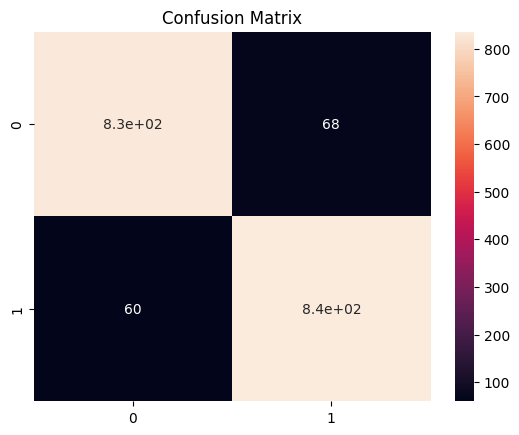

In [29]:
plt.title('Confusion Matrix')
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)
plt.show()

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.93      0.92      0.93       898
         pos       0.92      0.93      0.93       896

    accuracy                           0.93      1794
   macro avg       0.93      0.93      0.93      1794
weighted avg       0.93      0.93      0.93      1794



In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9286510590858417
